###Importando as bibliotecas e o dataset:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mortes = pd.read_csv("C:\\Users\\maria\\Downloads\\covid-19-dataset\\COVID_DEATHS.csv")
vacinacao = pd.read_csv("C:\\Users\\maria\\Downloads\\covid-19-dataset\\COVID_VACCINATIONS.csv")

##Análise

###17 - Em quais datas ocorreram mais mortes por covid mundialmente?

In [57]:
# removendo os valores NaN da coluna de mortes
mortes = mortes.dropna(subset = 'new_deaths')

# convertendo a coluna 'date' para o formato de data
mortes['date'] = pd.to_datetime(mortes['date']).dt.date

In [58]:
# agrupando por data e somando as mortes
mortes_dias = mortes.groupby('date')['new_deaths'].sum()
mortes_dias

date
2020-01-12      1.0
2020-01-13      0.0
2020-01-14      0.0
2020-01-15      0.0
2020-01-16      0.0
              ...  
2023-04-08    207.0
2023-04-09    629.0
2023-04-10    153.0
2023-04-11     94.0
2023-04-12      0.0
Name: new_deaths, Length: 1187, dtype: float64

In [59]:
# encontrando a data com o maior número de mortes
max_mortes_dia = mortes_dias.idxmax()
max_mortes_dia

datetime.date(2021, 7, 21)

In [60]:
# quantidade de mortes na data encontrada
max_mortes_cont = mortes_dias[max_mortes_dia]
max_mortes_cont

20005.0

In [61]:
# top 10 datas com o maior número de mortes
top_datas = mortes_dias.nlargest(10)
top_datas

date
2021-07-21    20005.0
2021-01-22    16313.0
2021-01-23    15884.0
2021-01-28    15746.0
2021-01-15    15723.0
2021-01-30    15553.0
2021-01-16    15520.0
2021-01-29    15518.0
2021-01-09    15478.0
2021-01-14    15319.0
Name: new_deaths, dtype: float64

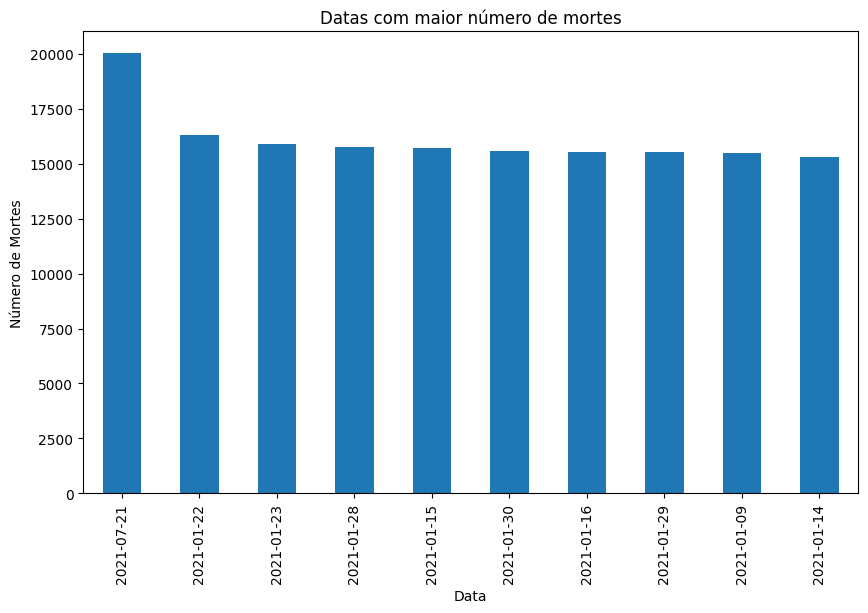

In [62]:
# plotando os dados
plt.figure(figsize=(10, 6))
top_datas.plot(kind='bar')
plt.title('Datas com maior número de mortes')
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.show()

Com exceção da data com o maior número de mortes, podemos notar que as máximas registradas foram no mês de janeiro de 2021. Considerando alguns fatores como estação do ano (inverno para a maior parte da população mundial) e que foi somente nesta época que a vacinação se iniciou ao redor do mundo, os dados são condizentes com o pico da pandemia.

###7 - Qual a relação entre pacientes hospitalizados e a quantidade de mortes por continente? (alterada)

In [66]:
# removendo os valores NaN da coluna de hospitalizações
mortes = mortes.dropna(subset = 'hosp_patients')

In [67]:
# calculando a média de pacientes hospitalizados e mortes por continente
continentes_st = mortes.groupby('continent').agg({
    'hosp_patients': 'mean',
    'total_deaths': 'mean'
}).reset_index()
continentes_st

,continent,hosp_patients,total_deaths
0,Africa,6145.780987,57922.367028
1,Asia,2550.138547,14244.171100
2,Europe,3215.889423,31104.670609
3,North America,23439.884196,365606.711913
4,Oceania,1321.390794,5926.287906
5,South America,703.757634,19876.240458


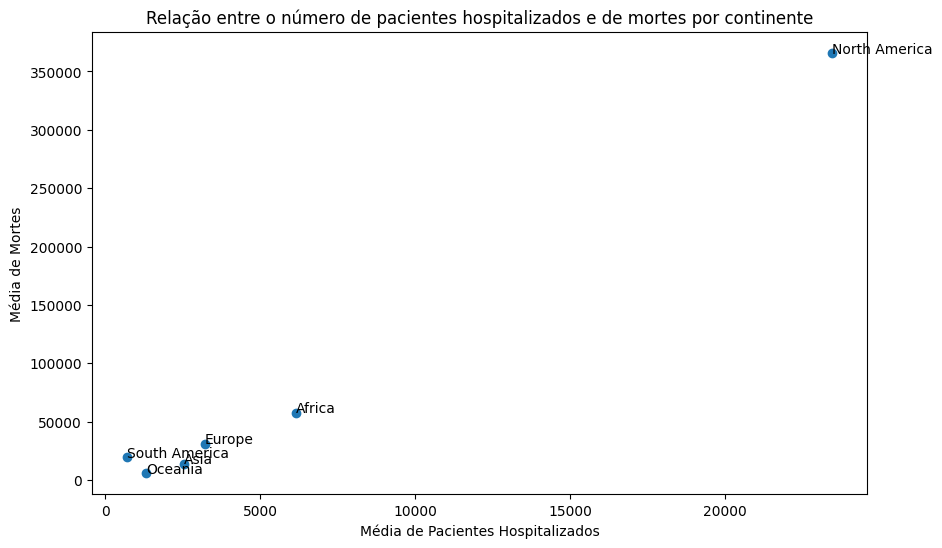

In [73]:
# criando um gráfico de dispersão para visualizar a relação
plt.figure(figsize=(10, 6))
plt.scatter(continentes_st['hosp_patients'], continentes_st['total_deaths'])
plt.title('Relação entre o número de pacientes hospitalizados e de mortes por continente')
plt.xlabel('Média de Pacientes Hospitalizados')
plt.ylabel('Média de Mortes')
# adicionando rótulos para cada continente
for i, linha in continentes_st.iterrows():
    plt.text(linha['hosp_patients'], linha['total_deaths'], linha['continent'])
plt.show()

Há algum problema com os dados aqui. Não entendi se as colunas de mortes e pacientes hospitalizados são cumulativas, mas a discrepância das médias da América do Norte para os outros continentes não faz sentido. Talvez utilizando as colunas de mortes e pacientes hospitalizados por milhão trariam melhores resultados? A média de mortes da América do Sul também está muito baixa.

###16 - Países com os maiores PIBs foram os que tiveram as menores taxas de mortalidade?
Alterando - Países com os maiores PIBs foram os que tiveram as maiores taxas de vacinação?

In [75]:
# removendo os valores NaN da coluna de vacinação
vacinacao = vacinacao.dropna(subset = 'people_fully_vaccinated_per_hundred')

In [79]:
# calculando a média das taxas de vacinação por país
media_vacinacao = vacinacao.groupby('location').agg({
    'people_fully_vaccinated_per_hundred': 'mean'
}).reset_index()
media_vacinacao

,location,people_fully_vaccinated_per_hundred
0,Afghanistan,16.283333
1,Africa,13.126153
2,Albania,26.390234
3,Algeria,11.437826
4,Andorra,48.001837
...,...,...
230,Wallis and Futuna,41.770556
231,World,40.277523
232,Yemen,1.305429
233,Zambia,0.707606


In [82]:
# encontrando os países com as maiores médias de taxa de vacinação
top_paises = media_vacinacao.nlargest(10, 'people_fully_vaccinated_per_hundred')
top_paises

,location,people_fully_vaccinated_per_hundred
81,Gibraltar,100.759748
43,China,86.129333
167,Pitcairn,85.107500
220,United Arab Emirates,83.438594
51,Cuba,73.525443
112,Kuwait,73.387889
210,Tokelau,73.060000
224,Uruguay,72.776803
42,Chile,70.561493
16,Bahrain,70.267453


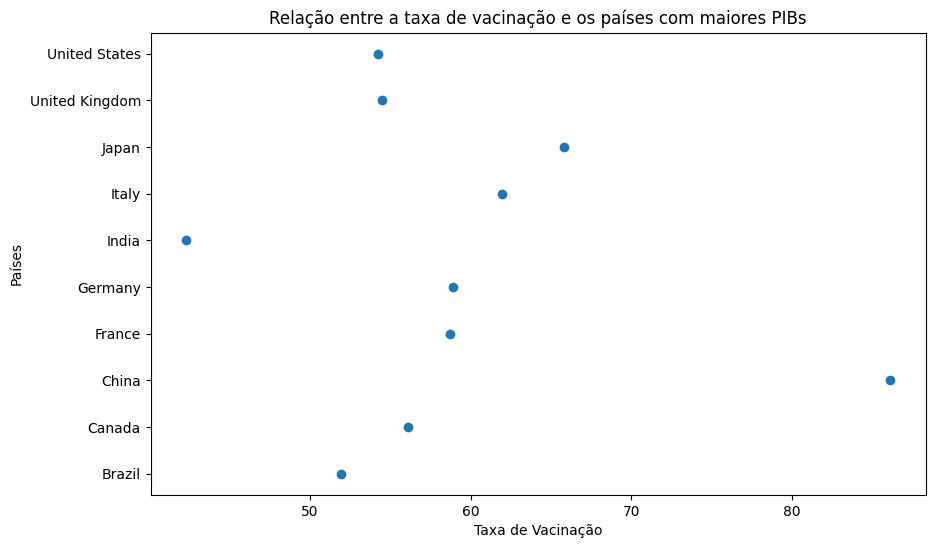

In [87]:
# filtrando os 10 países com os maiores PIBs
top_pibs = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'India', 'Italy', 'Brazil', 'Canada']
top_paises_pib = media_vacinacao[media_vacinacao['location'].isin(top_pibs)]

# criando um gráfico de dispersão para analisar a relação
plt.figure(figsize=(10, 6))
plt.scatter(top_paises_pib['people_fully_vaccinated_per_hundred'], top_paises_pib['location'])
plt.title('Relação entre a taxa de vacinação e os países com maiores PIBs')
plt.xlabel('Taxa de Vacinação')
plt.ylabel('Países')

plt.show()

O único país no top 10 PIBs que se encontra no top 10 de vacinação é a China. Todos os outros países com PIBs altos possuem uma taxa de vacinação média abaixo dos 70. Podemos notar que o PIB não foi um fator que contribuiu na vacinação.